In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA

# PCA for edge detection

This exercise will involve using principal component analysis as a fast tool to improve edge detection in neutron imaging. 
The idea for the exercise comes from discussion of PCA in [Jake VanderPlas' Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) {cite}`vanderplas_python_2016`, while the data was take from an [open dataset](https://doi.org/10.5281/zenodo.825926) {cite}`burca_crab_2017`. 
For this exercise, we will consider a neutron image of a fossil, that can be downloaded [here](https://github.com/arm61/trad_ml_methods/raw/main/fossil.tiff) (it is probably best to right click and save the file as `'fossil.tiff'`).

The first task is that we read in the file and can visualise it, for this we will require the `pillow` package as well as `numpy` and `matplotlib`.

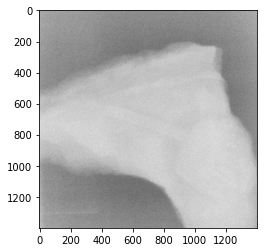

In [2]:
im = Image.open('fossil.tiff')
fossil = np.array(im)
plt.imshow(fossil, cmap='Greys')
plt.show()

Above, we have read in the image, converted this to a 2D `numpy` array and plotted this array as an image. 

We can see that the image isn't great, there are some features inside the fossil but these are hard to see. 
Here, we will look at using a simple PCA to improve the definition of the fossil. 
This could be used in combination with other more sophisticated methods, such as convolutional neural networks. 

The idea behind using PCA for noise filtering in an image is that components with a high variance (much greater than the noise) should be unaffected by the noise. 
Therefore, if you reconstruct the dataset which some subset of the signal then you can throw out the noise but keep the definition. 

The first things we should do it is to investigate the how much of the explained variance is described with each comment. 
We can achieve this by training our PCA on our data, without specifying a number of components. 

```python
pca = PCA().fit(fossil)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()
```

This should give a plot similar to that seen previously, where the max number of components is 1400 (the size of the image). 

The `PCA()` class, in addition to the `n_components` argument seen previously can be defined to produce a number of components that describes some fraction of the variance. 
For example, to return the components that can describe 60 % of the observed variance we run the following.

In [3]:
pca = PCA(0.6).fit(fossil)
pca.n_components_

3

The `n_components_` object shows that just 3 components are required to describe 60 % of our variance. 
We can use these three components to reconstruct our image with the help of an inverse transforms. 

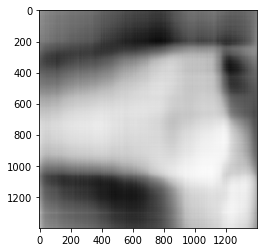

In [4]:
components = pca.transform(fossil)
filtered = pca.inverse_transform(components)
plt.imshow(filtered, cmap='Greys')

The result isn't great, however, this is understandable as only 60 % of the variance is represented and it can be seen that the edges of the fossil are improved compared to the background. 

## Exercise

Try different values of variance to obtain the best balance between noise reduction and detail for the image of the fossil used herein. 
You can also try this methodology on other neutron images, such as those from a [crab](https://github.com/arm61/trad_ml_methods/raw/main/crab.tiff), and another [fossil](https://github.com/arm61/trad_ml_methods/raw/main/fossil2.tiff). 